# Trees

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split

import data_processing
import feature_extraction

Load Dataset

In [8]:
feature_df = pd.read_csv("mode_classification_features.csv")
feature_df

,label,trajectory,start_time,trajectory_length,total_distance,average_speed,max_speed,duration,average_acceleration,speed_std,acceleration_std,bearing_changes,HCR,stops,SR,VC,VCR
0,train,01020080328144824.plt,14,69,62.604343,0.015478,0.031892,1.072778,6.854169e-07,0.012885,0.000053,10,0.144928,18,0.260870,15,0.217391
1,taxi,01020080617094444.plt,12,370,66.132033,0.008436,0.016202,0.113889,-3.304812e-06,0.004180,0.001117,30,0.081081,1,0.002703,55,0.148649
2,train,01020080618121033.plt,15,1509,142.036173,0.019471,0.034116,0.496944,2.207413e-05,0.007687,0.000693,10,0.006627,0,0.000000,17,0.011266
3,train,01020080618160000.plt,0,9502,728.675081,0.022617,0.034759,3.764167,-1.473139e-06,0.010152,0.000547,451,0.047464,503,0.052936,496,0.052200
4,train,01020080801023537.plt,15,2180,521.381432,0.026488,0.039892,0.681667,7.370202e-06,0.008672,0.000665,10,0.004587,1,0.000459,21,0.009633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,bike,17920081115105653.plt,13,521,4.944846,0.002576,0.023770,0.313889,1.760816e-05,0.001693,0.000715,225,0.431862,4,0.007678,233,0.447217
3638,walk,17920081116065153.plt,7,325,10.130223,0.001389,0.006847,0.180000,1.030992e-06,0.000795,0.000385,133,0.409231,8,0.024615,165,0.507692
3639,walk,17920081117025429.plt,2,197,0.727775,0.001429,0.005870,0.109444,3.954695e-06,0.000805,0.000429,76,0.385787,3,0.015228,93,0.472081
3640,walk,17920081117030421.plt,7,243,0.775003,0.001488,0.004844,0.137778,2.049320e-06,0.000803,0.000442,104,0.427984,12,0.049383,138,0.567901


Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = feature_df.drop(columns=['trajectory', 'label'])  # Drop irrelevant columns and the target.
Y = feature_df['label']  # Target variable

In [10]:
X

,start_time,trajectory_length,total_distance,average_speed,max_speed,duration,average_acceleration,speed_std,acceleration_std,bearing_changes,HCR,stops,SR,VC,VCR
0,14,69,62.604343,0.015478,0.031892,1.072778,6.854169e-07,0.012885,0.000053,10,0.144928,18,0.260870,15,0.217391
1,12,370,66.132033,0.008436,0.016202,0.113889,-3.304812e-06,0.004180,0.001117,30,0.081081,1,0.002703,55,0.148649
2,15,1509,142.036173,0.019471,0.034116,0.496944,2.207413e-05,0.007687,0.000693,10,0.006627,0,0.000000,17,0.011266
3,0,9502,728.675081,0.022617,0.034759,3.764167,-1.473139e-06,0.010152,0.000547,451,0.047464,503,0.052936,496,0.052200
4,15,2180,521.381432,0.026488,0.039892,0.681667,7.370202e-06,0.008672,0.000665,10,0.004587,1,0.000459,21,0.009633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,13,521,4.944846,0.002576,0.023770,0.313889,1.760816e-05,0.001693,0.000715,225,0.431862,4,0.007678,233,0.447217
3638,7,325,10.130223,0.001389,0.006847,0.180000,1.030992e-06,0.000795,0.000385,133,0.409231,8,0.024615,165,0.507692
3639,2,197,0.727775,0.001429,0.005870,0.109444,3.954695e-06,0.000805,0.000429,76,0.385787,3,0.015228,93,0.472081
3640,7,243,0.775003,0.001488,0.004844,0.137778,2.049320e-06,0.000803,0.000442,104,0.427984,12,0.049383,138,0.567901


Split the dataset into training and test sets (80% train, 20% test)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=36)

Initialize Random Forests

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=36)

Train the model

In [13]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=36)

Predict

In [14]:
y_pred = rf_model.predict(X_test)
y_pred

array(['walk', 'walk', 'walk', 'walk', 'bike', 'walk', 'bus', 'bus',
       'walk', 'walk', 'walk', 'walk', 'walk', 'bus', 'bike', 'bus',
       'walk', 'walk', 'car', 'walk', 'bus', 'walk', 'walk', 'walk',
       'bus', 'walk', 'bike', 'bus', 'bus', 'bike', 'walk', 'walk',
       'bike', 'walk', 'bike', 'walk', 'walk', 'walk', 'car', 'car',
       'walk', 'bike', 'walk', 'walk', 'walk', 'walk', 'walk', 'bus',
       'car', 'walk', 'walk', 'walk', 'walk', 'walk', 'bike', 'bike',
       'walk', 'walk', 'walk', 'car', 'bike', 'bike', 'walk', 'bike',
       'walk', 'walk', 'walk', 'walk', 'walk', 'bike', 'subway', 'bike',
       'walk', 'walk', 'walk', 'bike', 'walk', 'walk', 'walk', 'walk',
       'walk', 'bike', 'bike', 'bike', 'bike', 'car', 'subway', 'walk',
       'bike', 'car', 'bike', 'walk', 'walk', 'bike', 'walk', 'walk',
       'walk', 'bike', 'bike', 'car', 'bike', 'car', 'bike', 'bike',
       'walk', 'walk', 'bike', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk

Evaluate

In [16]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        bike       0.87      0.81      0.84       162
         bus       0.77      0.64      0.70        80
         car       0.76      0.85      0.80        92
      subway       0.90      0.63      0.74        41
        taxi       0.60      0.27      0.38        22
       train       0.67      0.50      0.57         4
        walk       0.86      0.97      0.91       328

    accuracy                           0.84       729
   macro avg       0.78      0.67      0.71       729
weighted avg       0.84      0.84      0.83       729

Confusion Matrix:
[[132   5   2   0   0   0  23]
 [  6  51   7   0   2   1  13]
 [  0   6  78   2   2   0   4]
 [  4   0   4  26   0   0   7]
 [  2   2  10   0   6   0   2]
 [  0   0   1   0   0   2   1]
 [  7   2   1   1   0   0 317]]


Plot

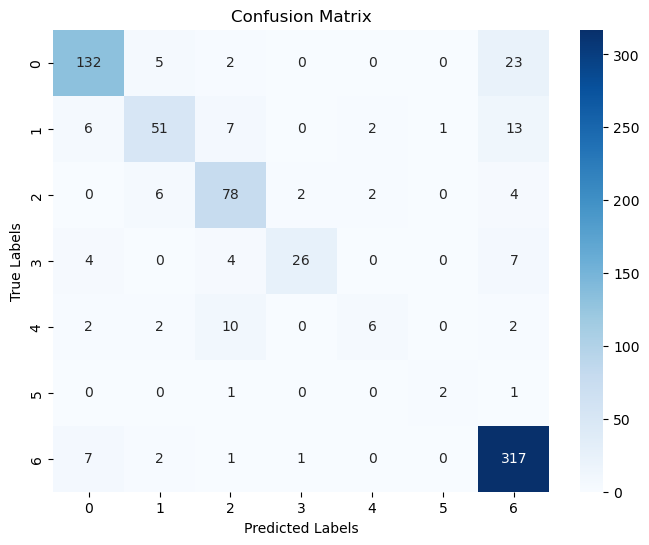

In [20]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Cross-Validation

Set parameters

In [22]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'max_depth': [None, 10, 20, 30],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2', None],    # Number of features to consider at each split
    'bootstrap': [True, False]                 # Use bootstrapping
}

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=36)

In [27]:
rf_model = RandomForestClassifier(random_state=36)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8630274737257814
Classification Report:
               precision    recall  f1-score   support

        bike       0.88      0.83      0.85       162
         bus       0.75      0.65      0.70        80
         car       0.78      0.84      0.81        92
      subway       0.83      0.59      0.69        41
        taxi       0.58      0.32      0.41        22
       train       0.50      0.50      0.50         4
        walk       0.87      0.96      0.91       328

    accuracy                           0.84       729
   macro avg       0.74      0.67      0.70       729
weighted avg       0.83      0.84      0.83       729



Plot

In [28]:
def plot_grid_search_results(grid_search, save_path=None):
    """
    Plots the mean test accuracy over parameter combinations during GridSearchCV.

    Parameters:
    - grid_search: A fitted GridSearchCV object.
    - save_path: (Optional) Path to save the plot as an image. If None, the plot is displayed.

    Returns:
    - None
    """
    # Convert cv_results_ to a DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)

    # Extract the mean test score for each parameter combination
    mean_test_scores = results_df['mean_test_score']
    param_combinations = range(1, len(mean_test_scores) + 1)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(param_combinations, mean_test_scores, marker='o', label='Mean Test Accuracy', linestyle='--')
    plt.title("Grid Search Accuracy Over Parameter Combinations")
    plt.xlabel("Parameter Combination Index")
    plt.ylabel("Mean Test Accuracy")
    plt.ylim(0, 1)  # Accuracy is between 0 and 1
    plt.grid(True)
    plt.legend()

    # Save or display the plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

Plot saved to grid_search_accuracy.png


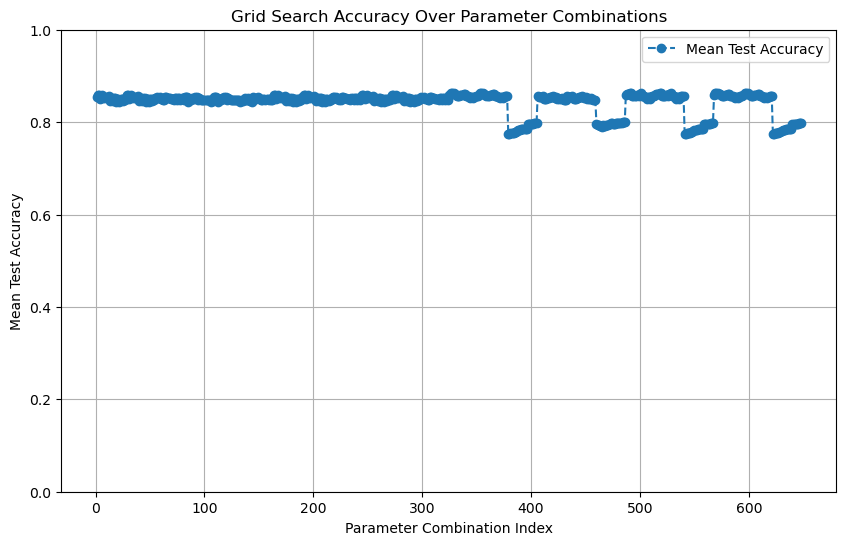

In [29]:
plot_grid_search_results(grid_search, save_path='grid_search_accuracy.png')

# Gradient Boosted Tree

In [33]:
gbt = GradientBoostingClassifier(random_state=36)

# Train the model
gbt.fit(X_train, Y_train)

# Make predictions
y_pred = gbt.predict(X_test)
# Evaluate performance
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.8326474622770919
Classification Report:
               precision    recall  f1-score   support

        bike       0.90      0.81      0.85       162
         bus       0.67      0.64      0.65        80
         car       0.80      0.85      0.83        92
      subway       0.71      0.61      0.66        41
        taxi       0.50      0.41      0.45        22
       train       1.00      0.75      0.86         4
        walk       0.88      0.94      0.91       328

    accuracy                           0.83       729
   macro avg       0.78      0.72      0.74       729
weighted avg       0.83      0.83      0.83       729



Cross validation

In [34]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid_gb,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, Y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_gbt = grid_search.best_estimator_
y_pred = best_gbt.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8729854467648671
Test Accuracy: 0.8353909465020576
Classification Report:
               precision    recall  f1-score   support

        bike       0.89      0.80      0.84       162
         bus       0.71      0.69      0.70        80
         car       0.79      0.88      0.84        92
      subway       0.79      0.66      0.72        41
        taxi       0.43      0.27      0.33        22
       train       0.60      0.75      0.67         4
        walk       0.88      0.94      0.91       328

    accuracy                           0.84       729
   macro avg       0.73      0.71      0.71       729
weighted avg       0.83      0.84      0.83       729



Plot the results

In [35]:
def plot_grid_search_results(grid_search, save_path=None):
    """
    Plots the mean test accuracy over parameter combinations during GridSearchCV.

    Parameters:
    - grid_search: A fitted GridSearchCV object.
    - save_path: (Optional) Path to save the plot as an image. If None, the plot is displayed.

    Returns:
    - None
    """
    # Convert cv_results_ to a DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)

    # Extract the mean test score for each parameter combination
    mean_test_scores = results_df['mean_test_score']
    param_combinations = range(1, len(mean_test_scores) + 1)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(param_combinations, mean_test_scores, marker='o', label='Mean Test Accuracy', linestyle='--')
    plt.title("Grid Search Accuracy Over Parameter Combinations")
    plt.xlabel("Parameter Combination Index")
    plt.ylabel("Mean Test Accuracy")
    plt.ylim(0, 1)  # Accuracy is between 0 and 1
    plt.grid(True)
    plt.legend()

    # Save or display the plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

Plot saved to grid_search_accuracy.png


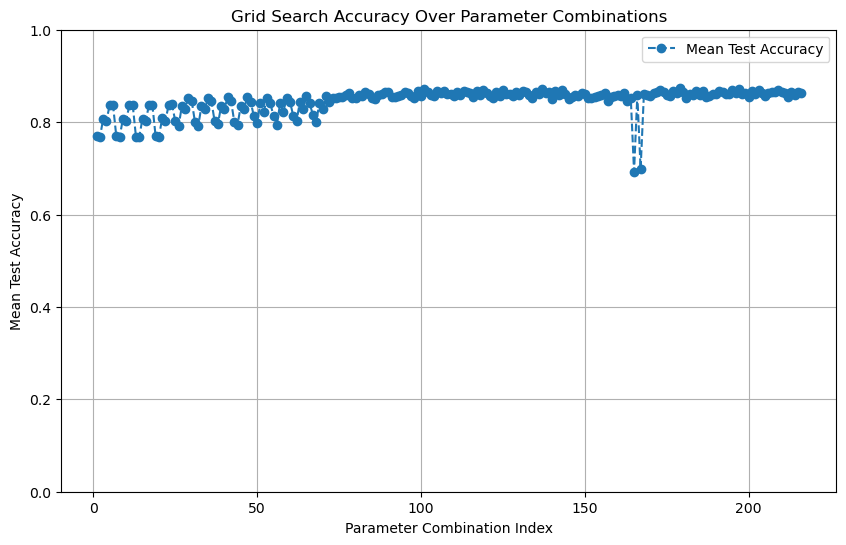

In [36]:
plot_grid_search_results(grid_search, save_path='grid_search_accuracy.png')

Feature Importance of Gradient Boosted Trees

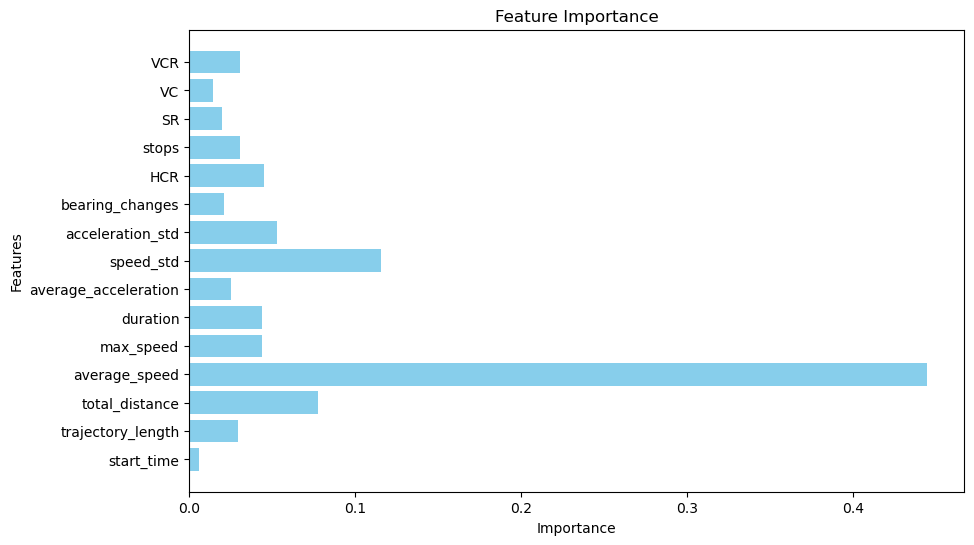

In [37]:
# Feature importance from the best model
feature_importance = best_gbt.feature_importances_
features = "start_time", "trajectory_length","total_distance","average_speed",	"max_speed","duration",	"average_acceleration",	"speed_std","acceleration_std",'bearing_changes', 'HCR','stops','SR','VC','VCR'

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()